In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import time

def fitness(valores,solution,objetivo):
  r = float(valores[0])
  for i in range(1,len(valores)):
    if solution[i-1]=='+':
      r = r + valores[i]
    elif solution[i-1]=='-':
      r = r - valores[i]
    elif solution[i-1]=='/':
      r = r / valores[i]
    elif solution[i-1]=='*':
      r = r * valores[i]
      '''
      # NO SE PUEDE CON PONENCIAS PORQUE NO SE PUEDE EVITAR QUE LOS NÚMEROS GENERADOS SE PASEN
      DEL NÚMERO MÁXIMO QUE PUEDE ALMACENAR PYTHON
    elif solution[i-1]=='**':
      print("-------")
      print(r)
      print(valores[i])
      r = pow(r,valores[i])
      '''
  return abs(r-objetivo), r

def mutation(solution,operadores):
  operadoresAux = operadores.copy()
  solutionAux = solution.copy()
  v = rn.randint(0,len(solution)-1)
  aux = solution[v]
  operadoresAux.pop(operadoresAux.index(aux))
  op = rn.randint(0,len(operadoresAux)-1)
  solutionAux[v] = operadoresAux[op]
  return solutionAux

def valorMax(valores):
  r=1
  for i in valores:
    r = r * i 
  return r

def recocidoSimulado(operadores, valores, objetivo, T, L, solucionInicial, k1, e1, MAXIT, verbose, factorDec):
  allFitness = []
  optFitness = []
  probs = []
  temperaturas = []

  pi = 1

  i_opt = 1
  it = 0
  solutionAnterior = solucionInicial
  solutionOptima = solutionAnterior
  f, r = fitness(valores,solutionOptima,objetivo)

  pMejora = 0
  contParada = 0

  while(it<MAXIT and f!=0 and contParada<k1*L):
    temperaturas.append(T)
    # Inicio algoritmo
    f1, r1 = fitness(valores,solutionAnterior,objetivo)
    allFitness.append(f1)
    solutionAleatoria = mutation(solutionAnterior,operadores)
    f2, r2 = fitness(valores,solutionAleatoria,objetivo)
    if f2<f1:
      solutionAnterior = solutionAleatoria
      if f2<f:
        pMejora = f-f2 / f
        if pMejora>=e1:
          contParada = 0
        f = f2
        solutionOptima = solutionAnterior
        i_opt = it + 1
    else:
      u = rn.uniform(0,1)
      pi = np.exp(- (f2-f1) / T )
      # if pi<0.9:
      #   print("pi=",pi,"f2-f1",f2,"-",f1,"=",(f2-f1),"iteracion",it)
      if pi>u:
        solutionAnterior = solutionAleatoria

    if (it+1)%L == 0:
      T = T * factorDec
    # print("Temperatura",T)
    it += 1
    contParada += 1
    if contParada>=k1*L and verbose == 1:
      print("INTERRUPCIÓN POR VIOLACIÓN DE CONDICIÓN DE PARADA: calidad de mejoras en el óptimo insuficiente en k1*L =",(k1*L),"iteraciones")

    optFitness.append(f)
    if pi<1:
        probs.append(pi)

  if verbose == 1:
    print("solucion optima", solutionOptima)
    print("fitness:",f)
    print("iteracion optimo", i_opt)
    print("iteración final", it)

  return allFitness, optFitness, probs, f, solutionOptima, temperaturas

def garantiaProbabilistica(operadores, valores, objetivo, T, L, solucionInicial, k1, e1, MAXIT, NSIMS, verbose):
  fopts = []
  for i in range(NSIMS):
    allFitness, optFitness, probs, f, solutionOptima, temperaturas = recocidoSimulado(operadores, valores, objetivo, T, L, solucionInicial, k1, e1, MAXIT, verbose, factorDec)
    fopts.append(f)
  return fopts

def getProblemaAleatorio(tamSecuencia,minVal,maxVal,operadores):
  secuenciaAleat = [rn.randint(minVal,maxVal)]
  solucionAleat = []
  for i in range(1,tamSecuencia):
    secuenciaAleat.append(rn.randint(minVal,maxVal))
    solucionAleat.append(operadores[rn.randint(0,len(operadores)-1)])
  return secuenciaAleat, solucionAleat

In [ ]:
operadores = ['+','-','*','/']
valores = [75,3,1,4,50,6,12,8]
objetivo = 852
T = 10000000
factorDec = 0.95
L = 50
solucionInicial = ['*','-','*','/','+','-','+']

e1 = 0.00001
k1 = 200
MAXIT = 100000
verbose = 1

start = time.process_time()
allFitness, optFitness, probs, f, solutionOptima, temperaturas = recocidoSimulado(operadores, valores, objetivo, T, L, solucionInicial, k1, e1, MAXIT, verbose, factorDec)
print("Tiempo ejecución:",time.process_time() - start)

solucion optima ['*', '+', '*', '-', '-', '+', '-']
fitness: 0.0
iteracion optimo 3282
iteración final 3282
Tiempo ejecución: 0.04285044499999913


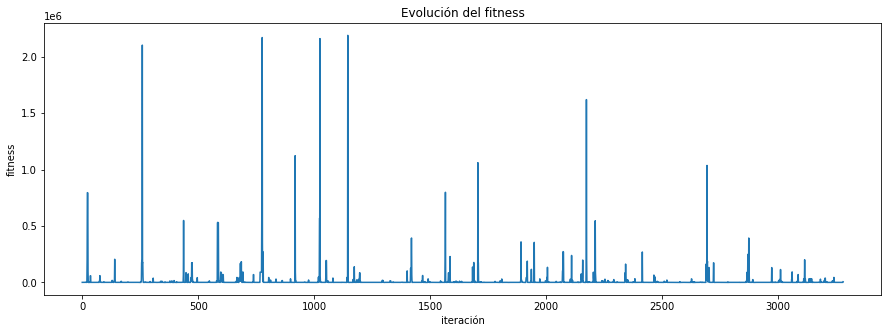

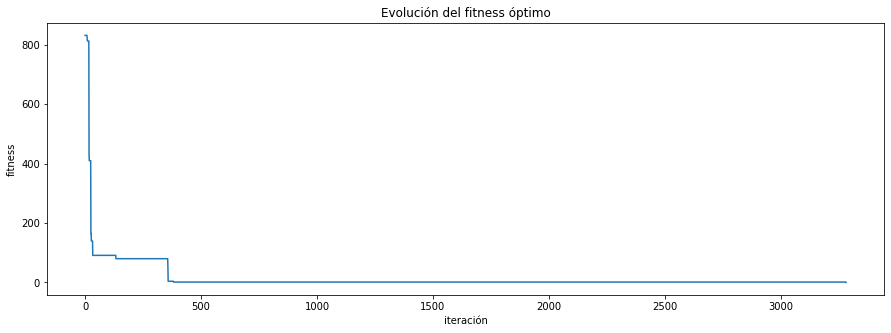

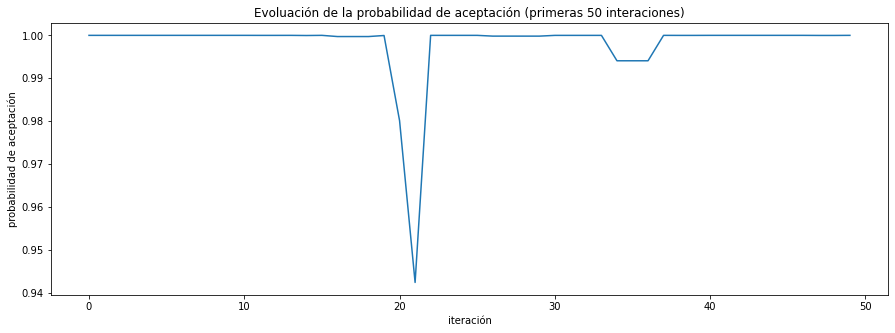

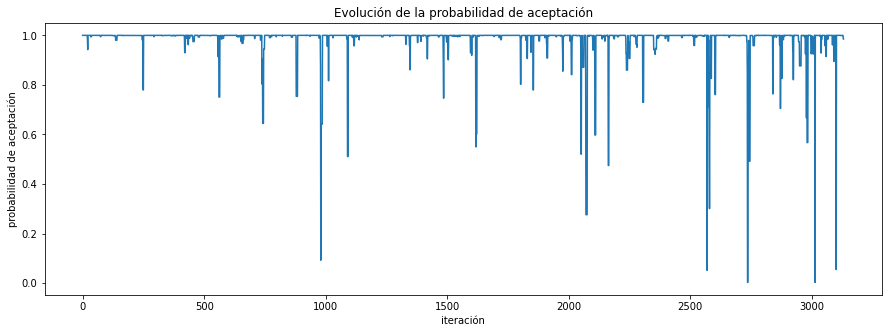

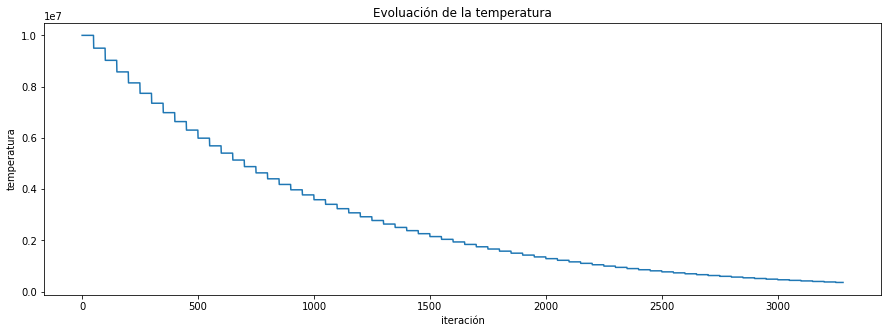

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(allFitness)
plt.ylabel('fitness')
plt.xlabel('iteración')
plt.title('Evolución del fitness')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(optFitness)
plt.ylabel('fitness')
plt.xlabel('iteración')
plt.title('Evolución del fitness óptimo')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(probs[:L])
plt.ylabel('probabilidad de aceptación')
plt.xlabel('iteración')
plt.title('Evoluación de la probabilidad de aceptación (primeras {} interaciones)'.format(L))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(probs)
plt.ylabel('probabilidad de aceptación')
plt.xlabel('iteración')
plt.title('Evolución de la probabilidad de aceptación')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(temperaturas)
plt.ylabel('temperatura')
plt.xlabel('iteración')
plt.title('Evoluación de la temperatura')
plt.show()

In [ ]:
print(temperaturas[len(temperaturas)-1])

356479.3225056023


In [ ]:
# Mismos parámetros anteriores
verbose = 0
NSIMS = 100
start = time.process_time()
fopts = garantiaProbabilistica(operadores, valores, objetivo, T, L, solucionInicial, k1, e1, MAXIT, NSIMS, verbose)
print("Tiempo ejecución:",time.process_time() - start)

Tiempo ejecución: 4.5785956250000055


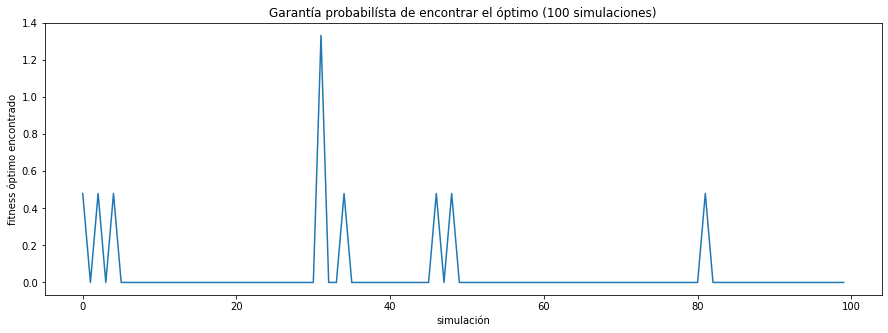

Óptimos globales encontrados: 92


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fopts)
plt.ylabel('fitness óptimo encontrado')
plt.xlabel('simulación')
plt.title('Garantía probabilísta de encontrar el óptimo ({} simulaciones)'.format(NSIMS))
plt.show()
ops = 0
for i in fopts:
  if i==0:
    ops +=1
print("Óptimos globales encontrados:",ops)

# Recocido simulado con una versión más compleja del problema

In [ ]:
tamSecuencia = 15
minVal=1
maxVal=50

secuenciaAleat, solucionAleat = getProblemaAleatorio(tamSecuencia,minVal,maxVal,operadores)

print(secuenciaAleat,"::",len(secuenciaAleat))
print(solucionAleat,"::",len(solucionAleat))

[7, 29, 25, 15, 7, 19, 4, 5, 35, 2, 28, 50, 21, 13, 35] :: 15
['+', '*', '*', '-', '+', '*', '/', '/', '-', '+', '*', '+', '*', '+'] :: 14


In [ ]:
print(maxValue(secuenciaAleat))

7515161828387292119040


In [ ]:
operadores = ['+','-','*','/']

valores = [72, 1, 61, 15, 7, 19, 4, 5, 1, 2, 28, 12, 17, 13, 44]
solucionInicial = ['+', '*', '/', '-', '+', '+', '/', '/', '-', '+', '*', '+', '-', '+']

# valores, solucionInicial = getProblemaAleatorio(tamSecuencia,minVal,maxVal,operadores)

objetivo = 852
T = 50000000000
factorDec = 0.9
L = 100

e1 = 0.00001
k1 = 200
MAXIT = 1000000
verbose = 1

start = time.process_time()
allFitness, optFitness, probs, f, solutionOptima, temperaturas = recocidoSimulado(operadores, valores, objetivo, T, L, solucionInicial, k1, e1, MAXIT, verbose, factorDec)
print("Tiempo ejecución:",time.process_time() - start)

ME PARO Y NO RESPIRO
solucion optima ['-', '+', '*', '/', '*', '+', '+', '+', '/', '/', '+', '/', '+', '*']
fitness: 0.08763505402157534
iteracion optimo 20623
iteración final 38848
Tiempo ejecución: 0.5672522539999818


In [ ]:
print(probs[:L])
print(min(probs[:L]))

[0.999999955715201, 0.9999997639904279, 0.9999997639904279, 0.9999997639904279, 0.9999997741260255, 0.9999997741260255, 0.999999985179059, 0.999999985179059, 0.9999999846494119, 0.9999999846494119, 0.9999999803289708, 0.9999999803289708, 0.9999994741026382, 0.9999931151025245, 0.9999776405176241, 0.9995529053295638, 0.9914532458921513, 0.9914532458921513, 0.9914532458921513, 0.9914532458921513, 0.9820423454998999, 0.9820423454998999, 0.9333350311306989, 0.9333350311306989, 0.99999998856, 0.99999998856, 0.99999953336853, 0.99999953336853, 0.99999953336853, 0.99999953336853, 0.9999999998044029, 0.9999999998044029, 0.9999999816770362, 0.99999999956, 0.9999997328853938, 0.9999997328853938, 0.9999997328853938, 0.9999999973174806, 0.9999999976368508, 0.9999999573866273, 0.9999999700800004, 0.9999999700800004, 0.9999997617003563, 0.9999997617003563, 0.9999997617003563, 0.9999997617003563, 0.9999997617003563, 0.9999997617003563, 0.9999997617003563, 0.9999997617003563, 0.9999997617003563, 0.999

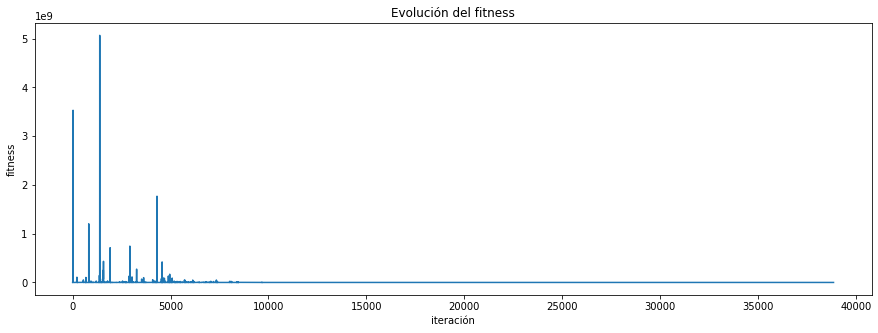

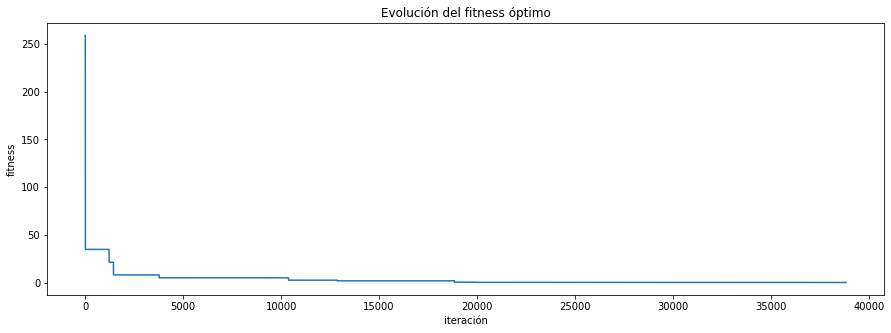

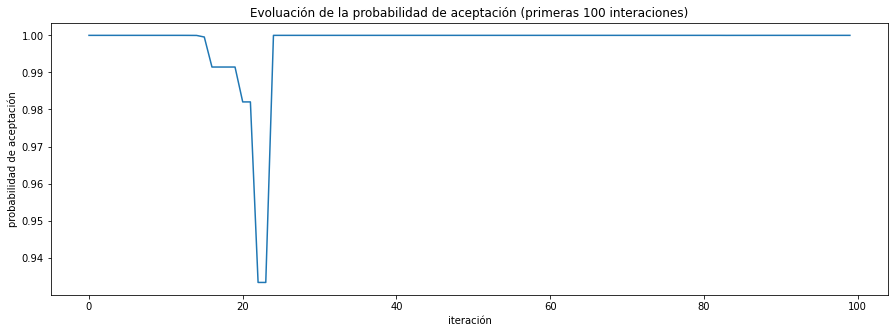

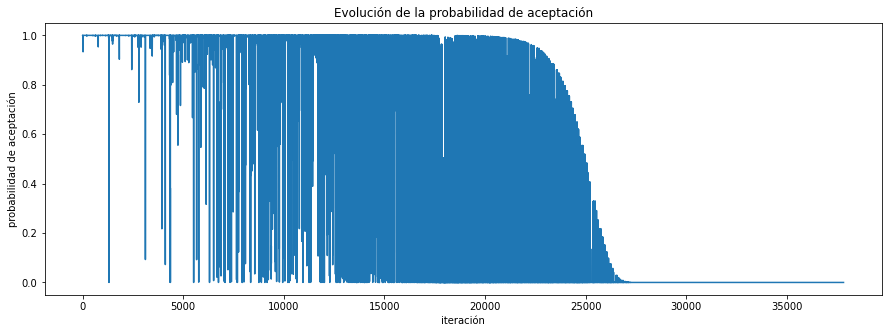

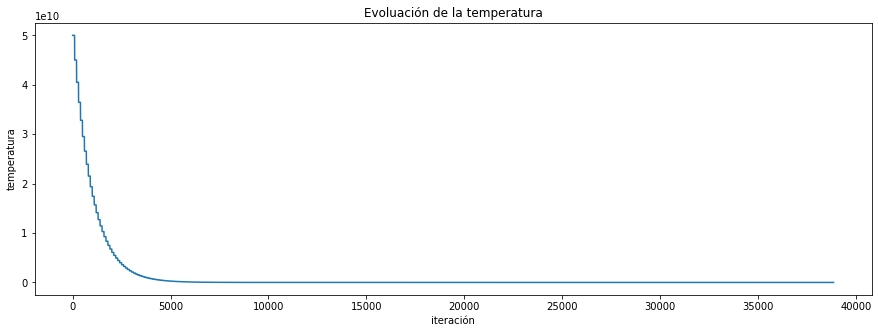

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(allFitness)
plt.ylabel('fitness')
plt.xlabel('iteración')
plt.title('Evolución del fitness')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(optFitness)
plt.ylabel('fitness')
plt.xlabel('iteración')
plt.title('Evolución del fitness óptimo')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(probs[:L])
plt.ylabel('probabilidad de aceptación')
plt.xlabel('iteración')
plt.title('Evoluación de la probabilidad de aceptación (primeras {} interaciones)'.format(L))
# plt.axis(['auto', 'auto', 0.999, 1.0])
plt.show()

plt.figure(figsize=(15,5))
plt.plot(probs)
plt.ylabel('probabilidad de aceptación')
plt.xlabel('iteración')
plt.title('Evolución de la probabilidad de aceptación')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(temperaturas)
plt.ylabel('temperatura')
plt.xlabel('iteración')
plt.title('Evoluación de la temperatura')
plt.show()

In [ ]:
# print(probs[:L])
print("Probabilidad mínima en las primeras {} iteraciones".format(L),min(probs[:L]))
print("Temperatura final de la simulación:",min(temperaturas))

Probabilidad mínima en las primeras 100 iteraciones 0.997368000600099
Temperatura final de la simulación: 1.6945894180076921


In [ ]:
verbose = 0
NSIMS = 100

start = time.process_time()
fopts = garantiaProbabilistica(operadores, valores, objetivo, T, L, solucionInicial, k1, e1, MAXIT, NSIMS, verbose)
print("Tiempo ejecución:",time.process_time() - start)

Tiempo ejecución: 38.64666284400005


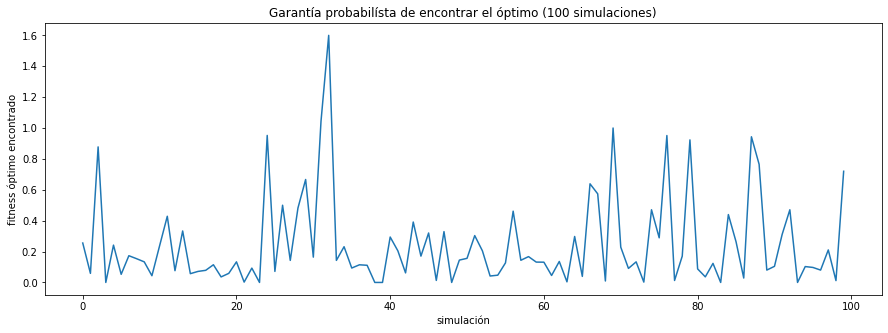

Óptimos globales encontrados: 7


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fopts)
plt.ylabel('fitness óptimo encontrado')
plt.xlabel('simulación')
plt.title('Garantía probabilísta de encontrar el óptimo ({} simulaciones)'.format(NSIMS))
plt.show()
ops = 0
for i in fopts:
  if i==0:
    ops +=1
print("Óptimos globales encontrados:",ops)